# Анализ данных по распространению COVID-2019. Статистика по странам.

Мною было принято решение изучать именно эти данные, так как основная тема наших научно-исследовальских семинаров была посвящена изучению распространения SARS-CoV-2. Здесь я исследую данные по распространению вируса, актуальные на начало июня 2020 года. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
covid = pd.read_csv("covid_19_data.csv", low_memory=False)

In [4]:
covid.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [6]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
mostrecent = covid[covid.ObservationDate == covid.ObservationDate.max()]

In [6]:
mostrecent.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
33874,33875,06/03/2020,NaN,Afghanistan,2020-06-04 02:33:14,17267.0,294.0,1522.0
33875,33876,06/03/2020,NaN,Albania,2020-06-04 02:33:14,1184.0,33.0,898.0
33876,33877,06/03/2020,NaN,Algeria,2020-06-04 02:33:14,9733.0,673.0,6218.0
33877,33878,06/03/2020,NaN,Andorra,2020-06-04 02:33:14,851.0,51.0,735.0
33878,33879,06/03/2020,NaN,Angola,2020-06-04 02:33:14,86.0,4.0,18.0


In [8]:
#Фильтрую данные, которые мне нужны для анализа: подвержденные случаи заражения, страны, количество выздоровивших и смертность.
outcomes = mostrecent.groupby('Country/Region')['Country/Region', 'Confirmed', 'Deaths', 'Recovered'].sum()

In [9]:
outcomes.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,17267.0,294.0,1522.0
Albania,1184.0,33.0,898.0
Algeria,9733.0,673.0,6218.0
Andorra,851.0,51.0,735.0
Angola,86.0,4.0,18.0


# Топ стран по смертности, случаям заражения, выздоровившим и умершим.
Здесь я исключаю страны с незначительным количеством смертей, чтобы были показаны страны с большим количеством умерших.

In [10]:
outcomes['DeathRate'] = outcomes[outcomes['Deaths'] > 100]['Deaths']/outcomes[outcomes['Deaths'] > 100]['Confirmed'] * 100

In [11]:
outcomes.head()

,Confirmed,Deaths,Recovered,DeathRate
Country/Region,,,,
Afghanistan,17267.0,294.0,1522.0,1.70267
Albania,1184.0,33.0,898.0,NaN
Algeria,9733.0,673.0,6218.0,6.91462
Andorra,851.0,51.0,735.0,NaN
Angola,86.0,4.0,18.0,NaN


In [31]:
deathrate_top = outcomes.sort_values('DeathRate', ascending = False).head(15).sort_values(by = 'DeathRate')

In [12]:
deathrate_top

,Confirmed,Deaths,Recovered,DeathRate
Country/Region,,,,
Romania,19669.0,1296.0,13800.0,6.589049
Ireland,25111.0,1659.0,22698.0,6.606666
Algeria,9733.0,673.0,6218.0,6.914620
Slovenia,1477.0,109.0,1358.0,7.379824
Canada,94641.0,7579.0,51506.0,8.008157
Ecuador,40966.0,3486.0,20019.0,8.509496
Sweden,40803.0,4542.0,0.0,11.131534
Spain,240326.0,27128.0,150376.0,11.288000
Mexico,101238.0,11729.0,72680.0,11.585571


В таблице отчетливо видно, что на данный момент самый большой процент смертности зарегистрирован в Бельгии. Так же большие значения смерности имеются в Великобритании, Италии и Франции.

In [15]:
outcomes['Active'] = outcomes['Confirmed'] - outcomes['Recovered'] - outcomes['Deaths']

In [16]:
active_top = outcomes.sort_values(by='Active', ascending = False).head(15).sort_values(by = 'Active')

In [15]:
active_top

,Confirmed,Deaths,Recovered,DeathRate,Active
Country/Region,,,,,
Canada,94641.0,7579.0,51506.0,8.008157,35556.0
Sweden,40803.0,4542.0,0.0,11.131534,36261.0
Italy,233836.0,33601.0,160938.0,14.369473,39297.0
Netherlands,46939.0,5996.0,180.0,12.774026,40763.0
Bangladesh,55140.0,746.0,11590.0,1.352920,42804.0
Pakistan,80463.0,1688.0,28923.0,2.097859,49852.0
Spain,240326.0,27128.0,150376.0,11.288000,62822.0
Chile,113628.0,1275.0,21605.0,1.122083,90748.0
France,192330.0,29024.0,69573.0,15.090729,93733.0


В таблице видно, что на данный момент больше всего активных зараженных находится в России, Великобритании, Бразилии и США.

In [28]:
recovered_top =  outcomes.sort_values(by='Recovered', ascending = False).head(15).sort_values(by = 'Recovered')
confirmed_top =  outcomes.sort_values(by='Confirmed', ascending = False).head(15).sort_values(by = 'Confirmed')

In [32]:
def plot_cell(top, label, x, y):
    labels = top.index.to_series()
    l = np.arange(len(labels))  # Расположение меток
    width = 0.3  # ширина колонок

    rect = ax[x,y].barh(l, top[label].values, width, label=label)
    
    ax[x,y].set_title(label + ' cases',fontsize=18)
    ax[x,y].set_yticks(l)
    ax[x,y].set_yticklabels(labels)

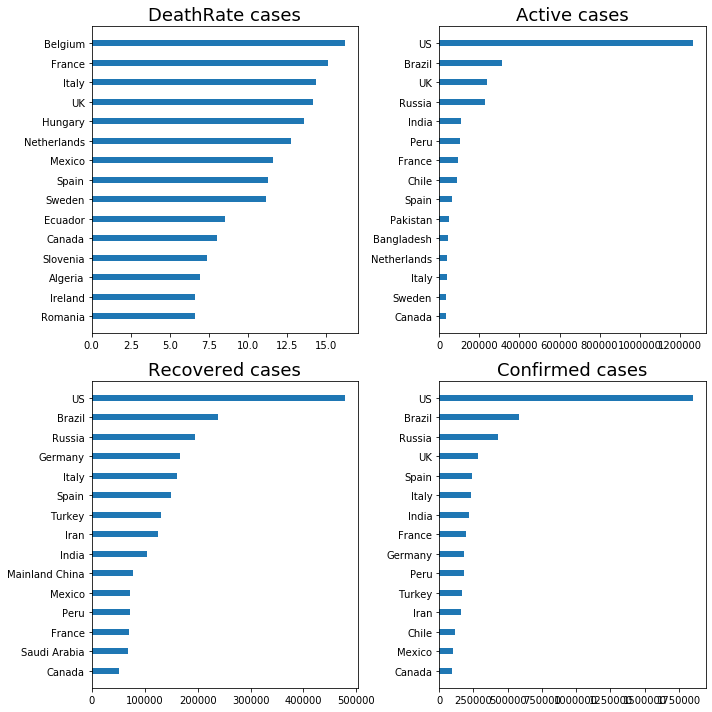

In [19]:
%matplotlib inline 

fig, ax = plt.subplots(figsize=(10, 10), ncols=2, nrows=2)

plot_cell(deathrate_top, 'DeathRate', 0, 0)
plot_cell(active_top, 'Active', 0, 1)
plot_cell(recovered_top, 'Recovered', 1, 0)
plot_cell(confirmed_top, 'Confirmed', 1, 1)

fig.tight_layout()


plt.show()


Здесь изображены 4 графика по каждому параметру для более наглядного сравнения. Отчетливо видно, что США и Бразилия занимают первое и второе места соответственно по таким параметрам, как активные случаи заражения, всего число подветвержденных случаев и число выздоровивших. Что касается нашей страны, то на графике видно, что Россия хоть и находится на третьем месте по количеству подтвержденных случаев заболевания, она не входит в топ-15 стран по смертности. 

# Выздоровившие и умершие в России, США, Великобритании, Испании, Италии и Франции

In [33]:
covid[['ObservationDate', 'Deaths', 'Recovered']].head()

,ObservationDate,Deaths,Recovered
0,01/22/2020,0.0,0.0
1,01/22/2020,0.0,0.0
2,01/22/2020,0.0,0.0
3,01/22/2020,0.0,0.0
4,01/22/2020,0.0,0.0


In [34]:
covid_country = covid.groupby(['ObservationDate', 'Country/Region'])['ObservationDate', 'Deaths', 'Recovered'].sum()

In [35]:
covid_country.reset_index(level=0, inplace=True)
covid_country.reset_index(level=0, inplace=True)
#covid_country.index = pd.to_datetime(covid_country.index)

In [36]:
def plot_country(country):
    plt.figure(figsize=(15,5))

    data = covid_country[covid_country['ObservationDate'] > '02/20/2020'][covid_country['Country/Region'] == country]
    plt.plot(data['ObservationDate'], data['Deaths']
        , label = 'Death cases'
        , color = '#ff3300'     
        , marker = 'o')
    
    plt.plot(data['ObservationDate'], data['Recovered']
        , label = 'Recovered cases'
        , color = '#00e600'
        , marker = 'o')
    
    plt.title('Death vs recovered cases over the time in ' + country, size=30)
    plt.ylabel('Cases',size=20)
    plt.xlabel('Timeline',size=20)
    plt.xticks(rotation=45,size=15)
    plt.yticks(size=15)

    plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

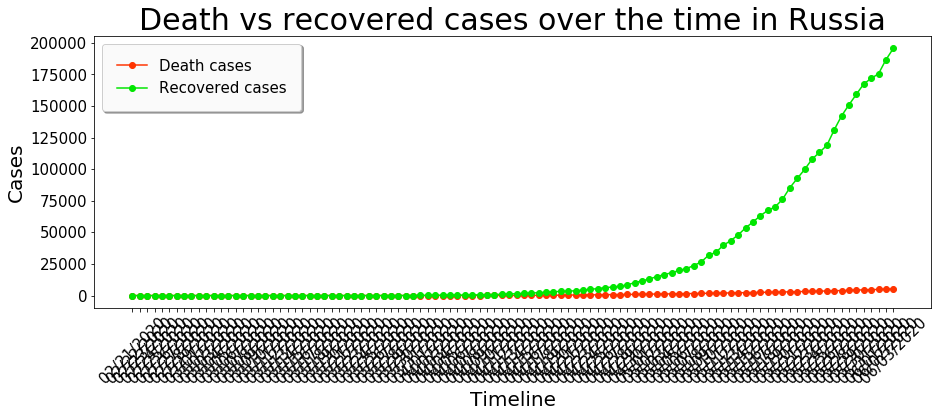

In [37]:
plot_country('Russia')

 На графике видно, что количество выздоровивших растет очень быстро и намного превышает количество смертей, которое остается примерно на одной линии. 

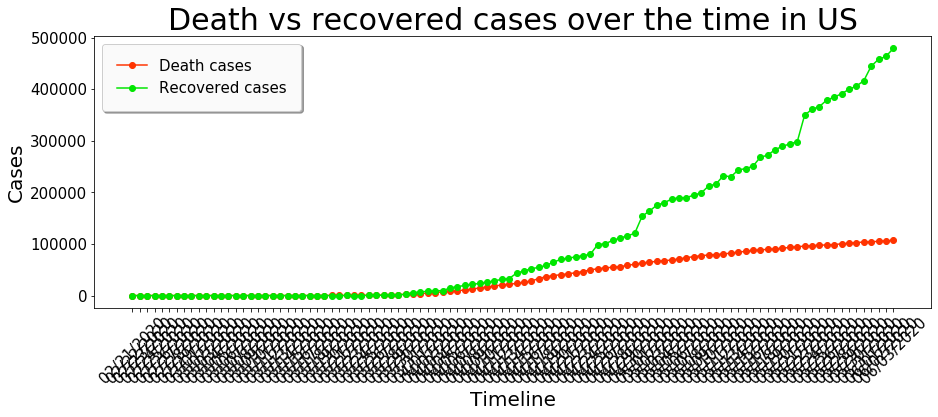

In [25]:
plot_country('US')

В США количество выздоровивших достаточно резко возрастает с определенного момента, количество смертей меньше и растет медленее, но при этом оно все равно очень велико. 

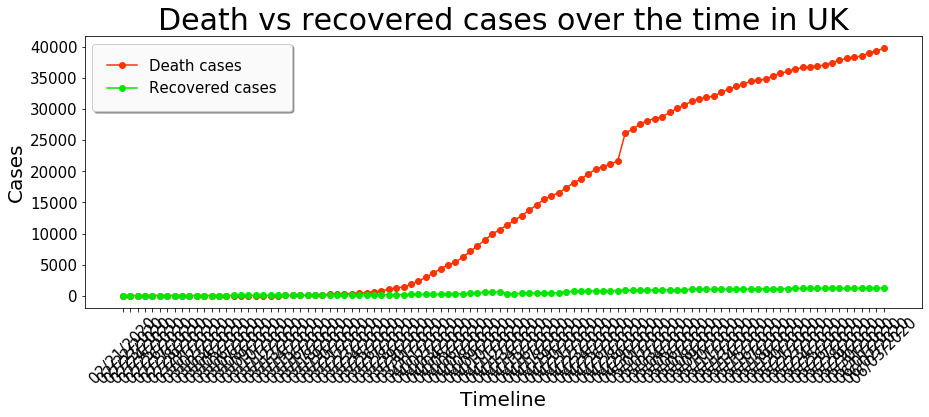

In [26]:
plot_country('UK')

В Велибритании количество умерших намного превосходит количество выздоровивших. Количество смертей растет быстро и резко, в то время как количество выздоровивших меняется очень незначительно.

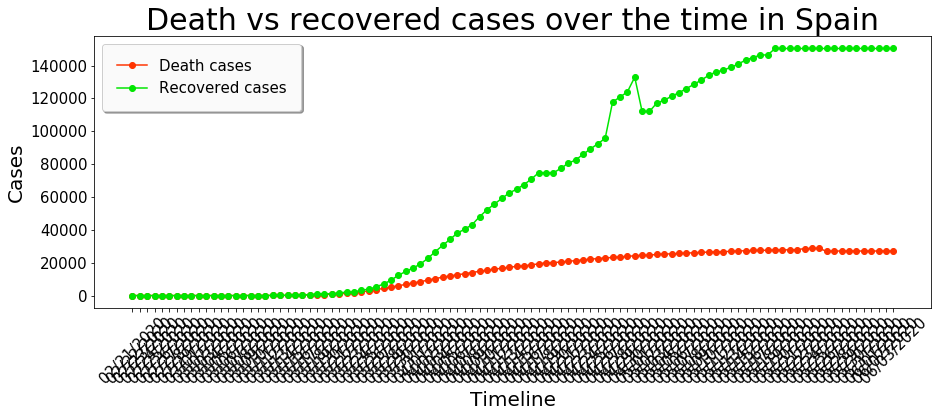

In [27]:
plot_country('Spain')

В Испании количество выздоровивших растет намного быстрее, чем умерших, но в определенный момент количество и тех, и других перестает меняться. 

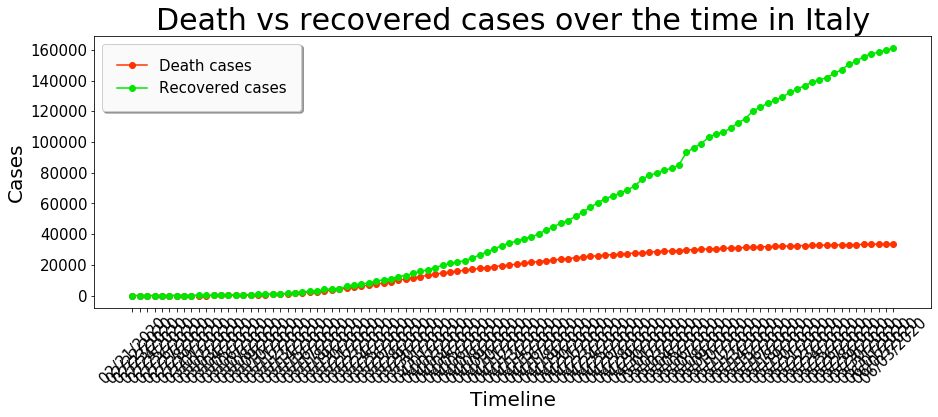

In [28]:
plot_country('Italy')

В Италии количество выздоровивших намного больше, и их число еще увеличивается. В это же время количество смертей растет незначительно и в определенный момент практически перестает изменяться. 

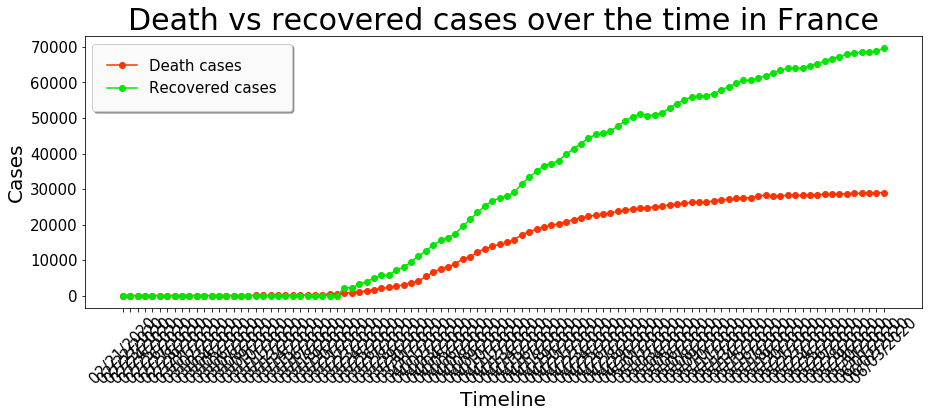

In [29]:
plot_country('France')

На графике видно, что и количество смертей, и количество выздоровивших велико и быстро растет, но в определенный момент количество умерших перестает увеличиваться, в то время как количество выздоровивших продолжает расти. 

Подводя итог, можно сказать, что в большинстве стран сейчас количество выздоровивших увеличивается, а количество умерших практически не изменяется. Сейчас волна заражений немного уменьшает свои обороты и эпидемия стихает. 